In [157]:
%pylab inline
import pandas
from matplotlib.patches import Ellipse

font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [158]:
#https://www.astro.umd.edu/~ssm/data/gasrichdatatable.txt
data = np.genfromtxt('gasrichdatatable.txt') 

In [159]:
Vc = data[:,2]
errVc = data[:,3]
logM = data[:,4]
errlogM = data[:,5]
print len(logM)

47


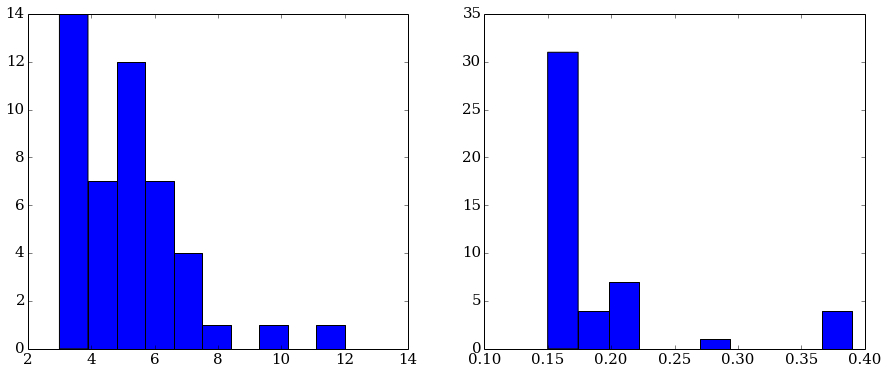

In [160]:
figure(figsize=(15, 6))
subplot(1, 2, 1)
herrvc = hist(errVc, bins=10)
subplot(1, 2, 2)
herrM = hist(errlogM, bins=10)

(0, 200)

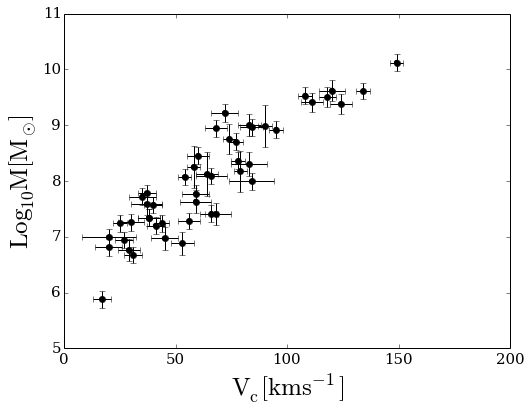

In [161]:
figure(figsize=(8, 6))
scatter(Vc, logM)
#Ellipse(xy = (Vc[0], logM[0]), width=errVc[0], height=errlogM[0])
errorbar(Vc, logM, xerr=errVc, yerr=errlogM, c='k', fmt='o')
xlabel('$\mathrm{V_c [km s^{-1}]}$', fontsize=25)
ylabel('$\mathrm{Log_{10} M [M_{\odot}]}$', fontsize=25)
xlim(0, 200)
#ylim(0, 20)

In [162]:
def likelihood(x_i, y_i, a, b, sigmax_i, sigmay_i, p):
    L = -0.5 * np.sum((y_i - a - b*x_i)**2.0/(sigmay_i**2.0 + b**2.0*(sigmax_i**2.0) - (2.0*p*b*sigmax_i*sigmay_i)))
    return L

In [163]:
likelihood(Vc, logM, 5.5, 12, 0.5, 0.5, 0.0)

-485309.92566482758

In [164]:
N_P = 1000
A = np.linspace(5, 7.0, N_P)
B = np.linspace(0.0, 1/15., N_P)

N1 = (max(A)-min(A))/N_P
N2 = (max(B)-min(B))/N_P



print N1, N2

0.002 6.66666666667e-05


In [165]:
L4 = np.zeros([int((6.45-5.8)/N1), int((0.035-0.025)/N2)])
L5 = np.zeros([int((6.45-5.8)/N1), int((0.035-0.025)/N2)])
L6 = np.zeros([int((6.45-5.8)/N1), int((0.035-0.025)/N2)])

#L4 = np.zeros([N_P, N_P])
#L5 = np.zeros([N_P, N_P])
#L6 = np.zeros([N_P, N_P])

#A = np.linspace(5, 7.0, N_P)
#B = np.linspace(0.0, 1/15., N_P)

A = np.linspace(5.8, 6.45, int((6.45-5.8)/N1))
B = np.linspace(0.025, 0.035, int((0.035-0.025)/N2))

for i in range(len(A)):
    for j in range(len(B)):
        L4[i][j] = likelihood(Vc, logM, A[i], B[j], errVc, errlogM, 0.5)
        L5[i][j] = likelihood(Vc, logM, A[i], B[j], errVc, errlogM, 0.0)
        L6[i][j] = likelihood(Vc, logM, A[i], B[j], errVc, errlogM, -0.5)

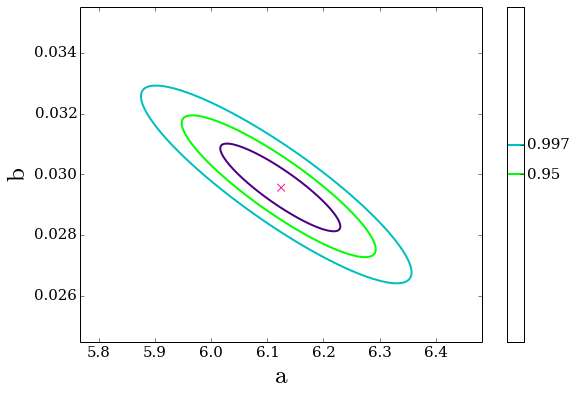

In [195]:
figure(figsize=(9, 6))
ax = subplot(1,1,1)
levels=[1-0.683, 1-0.95, 1-0.997]
#contour(A, B, np.exp(L4.T-np.max(L4.T)), levels=levels, colors=['orange', 'lime', 'c', 'm'], linestyles='--')
contour(A, B, np.exp(L5.T-np.max(L5.T)), 3, colors=['indigo', 'lime', 'c'], linewidths=2, levels=levels)
#contour(A, B, np.exp(L6.T-np.max(L6.T)), levels=levels, colors=['orange', 'lime', 'c', 'm'], linestyles=':')
#bounds = []

cbar = colorbar()
#cbar.ax.set_yticklabels()
cbar.ax.set_yticklabels(['0.95', '0.997','0.683'])
#xlim(5.8, 6.45)
#ylim(0.025, 0.035)
cbar.set_clim(1, 3.1)
xlabel('$\mathrm{a}$', fontsize=25)
ylabel('$\mathrm{b}$', fontsize=25)
scatter(A_best[1], B_best[1], marker='x', s=60, color='deeppink')
savefig('contoursAB.png', dpi=400, bbox_inches='tight')

In [131]:
A_best = np.zeros(3)
B_best = np.zeros(3)

L4_max = np.exp(L4-np.max(L4))
L5_max = np.exp(L5-np.max(L5))
L6_max = np.exp(L6-np.max(L6))

index4 = np.where(L4_max == 1.0)
index5 = np.where(L5_max == 1.0)
index6 = np.where(L6_max == 1.0)

A_best[0] = A[index4[0]]
B_best[0]=  B[index4[1]]

A_best[1] = A[index5[0]]
B_best[1]=  B[index5[1]]
              
A_best[2] = A[index6[0]]
B_best[2]=  B[index6[1]]
              
print A_best, B_best


[ 6.13904321  6.125       6.11898148] [ 0.02936242  0.02956376  0.02963087]


In [40]:
A_0 = 5.93040123
B_0 = 0.02936242

A_1 = 6.125
B_1 = 0.02956376

A_2 = 5.93842593
B_2 = 0.02963087

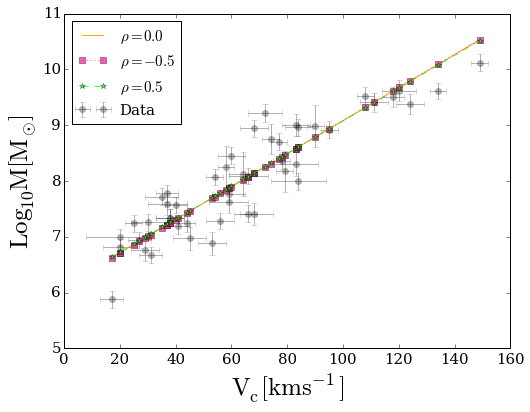

In [193]:
figure(figsize=(8, 6))
#scatter(Vc, logM)
#Ellipse(xy = (Vc[0], logM[0]), width=errVc[0], height=errlogM[0])
errorbar(Vc, logM, xerr=errVc, yerr=errlogM, c='k', fmt='o', alpha=0.3, label='Data')
plot(Vc, A_best[1] + B_best[1]*Vc, ls='-', label=r'$\rho=0.0$', color='orange')
plot(Vc, A_best[2] + B_best[2]*Vc, ls=':', alpha=0.7, label=r'$\rho=-0.5$', marker='s' ,color='deeppink')
plot(Vc, A_best[0] + B_best[0]*Vc, ls='--', alpha=0.7, label=r'$\rho=0.5$', marker='*', color='lime')

#plot(Vc, A_best2 + B_best2*Vc, c='b', alpha=0.5)
xlabel('$\mathrm{V_c [km s^{-1}]}$', fontsize=25)
ylabel('$\mathrm{Log_{10} M [M_{\odot}]}$', fontsize=25)
legend(fontsize=15, loc='best')
#xlim(0, 200)
#ylim(0, 20)

savefig('Tully-Fisher-fit.png', dpi=400, bbox_inches='tight')

<matplotlib.colorbar.Colorbar instance at 0x7f4973e1d368>

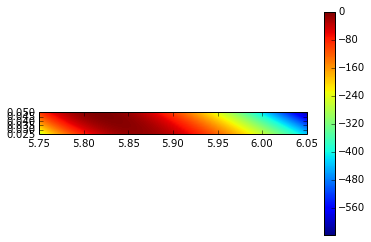

In [258]:
imshow(L4-np.max(L4), origin='lower', extent=[min(A), max(A), min(B), max(B)])
colorbar()

In [85]:
np.min(np.exp(L4-np.max(L4)))

2.2660366525538467e-51